In [12]:
import pandas as pd
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [1]:
# Subir el archivo de coches
from google.colab import files
uploaded = files.upload()

Saving transit_limpio.csv to transit_limpio.csv


In [3]:
dfTransit = pd.read_csv('transit_limpio.csv', sep=",")
dfTransit.head(10)

region  price    year  cylinders  fuel  odometer  \
0            birmingham  31900  2019.0          6     1   29497.0   
1            birmingham  32900  2019.0          6     1    6735.0   
2            birmingham  34500  2019.0          6     1    7646.0   
3            birmingham  32700  2019.0          6     1   13646.0   
4            birmingham  32900  2019.0          6     1    6735.0   
5            birmingham  34800  2019.0          6     1   31020.0   
6            birmingham  32800  2018.0          6     1   43479.0   
7            birmingham  38300  2020.0          6     1    7540.0   
8            birmingham  34800  2019.0          6     1   31020.0   
9  huntsville / decatur  14882  2015.0          6     1  151780.0   

   title_status  transmission  drive        lat       long  
0             1             1      1  36.464100 -86.658280  
1             1             1      1  36.464100 -86.658280  
2             1             1      1  36.464100 -86.658280  
3             1             1      1  36.464100 -86.658280  
4             1             1      1  36.464100 -86.658280  
5             1             1      1  36.464100 -86.658280  
6             1             1      1  36.464100 -86.658280  
7             1             1      1  36.464100 -86.658280  
8             1             1      1  36.464100 -86.658280  
9             2             1      1  36.107596 -86.743824

In [5]:
# Coeficiente de correlacion: Como es e importante una variable para predecir otra
corr_test = pearsonr(x= dfTransit['odometer'], y = dfTransit['price'])
print("Coeficiente de correlacion de Pearson:", corr_test[0])
print("P-value:", corr_test[1])

Coeficiente de correlacion de Pearson: -0.6710983733962215
P-value: 2.5072423294235712e-48


In [7]:
X = dfTransit[['odometer']]
y = dfTransit[['price']]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     206.9
Date:                Tue, 10 Jun 2025   Prob (F-statistic):           1.22e-35
Time:                        10:39:28   Log-Likelihood:                -2940.0
No. Observations:                 287   AIC:                             5884.
Df Residuals:                     285   BIC:                             5891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.585e+04    658.075     54.481      0.0

In [8]:
# Intervalo de confianza
modelo.conf_int(alpha=0.1)

array([[ 3.47668711e+04,  3.69388064e+04],
       [-1.41713552e-01, -1.12541266e-01]])

In [10]:
# predicciones con intervalo de confianza del 90%
predicciones = modelo.get_prediction(exog=X_train).summary_frame(alpha=0.1)
predicciones.head(5)

mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  34880.822615  606.053848   33880.701820   35880.943410  23572.888470   
1  34996.635685  612.092535   33986.549742   36006.721627  23687.815824   
2  32039.016521  476.897809   31252.031308   32826.001733  20747.936911   
3  35357.041888  631.172396   34315.470020   36398.613756  24045.366284   
4  34187.469728  570.941571   33245.291835   35129.647621  22884.512938   

   obs_ci_upper  
0  46188.756760  
1  46305.455545  
2  43330.096130  
3  46668.717493  
4  45490.426518

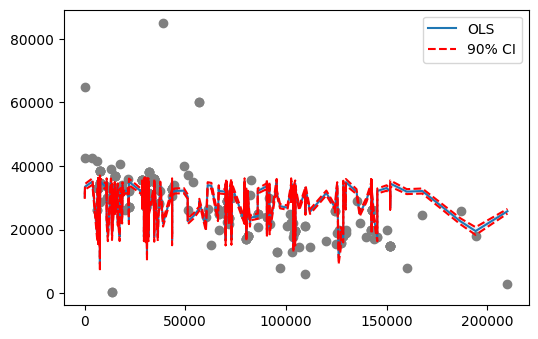

In [13]:
# grafico con esas predicciones
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color="gray" )
ax.plot(predicciones['x'], predicciones['mean'], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones['mean_ci_lower'], linestyle='--', color='red', label="90% CI")
ax.plot(predicciones['x'], predicciones['mean_ci_upper'], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones['mean_ci_lower'], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend()